In [1]:
import os, shutil

from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
original_dataset_dir = '../dataset/dogs_vs_cats/train/train'
base_dir = 'dogs_vs_cats'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#  数据增强

In [4]:
datagen = ImageDataGenerator(
              rotation_range=40,
              width_shift_range=0.2,
              height_shift_range=0.2,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True,
              fill_mode='nearest')

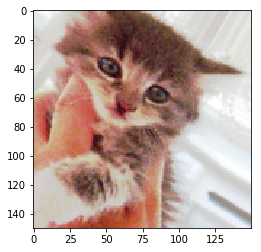

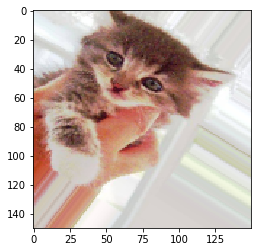

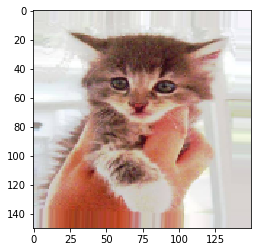

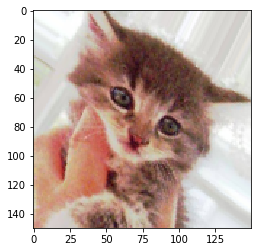

In [6]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
#plt.show()

In [11]:
fnames[:3]

['dogs_vs_cats\\train\\cats\\cat.0.jpg',
 'dogs_vs_cats\\train\\cats\\cat.1.jpg',
 'dogs_vs_cats\\train\\cats\\cat.10.jpg']

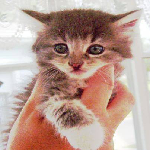

In [12]:
img

In [14]:
image.img_to_array(img).shape

(150, 150, 3)

In [19]:
(image.img_to_array(img)).reshape((1,) + image.img_to_array(img).shape).shape

(1, 150, 150, 3)

# Dropout

In [20]:
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
                   rescale=1./255,
                   rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=32,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/100
100/100 [==============================] - 219s 2s/step - loss: 0.6176 - acc: 0.6594 - val_loss: 0.5870 - val_acc: 0.6700
Epoch 2/100
100/100 [==============================] - 203s 2s/step - loss: 0.6055 - acc: 0.6578 - val_loss: 0.5930 - val_acc: 0.6750
Epoch 3/100
100/100 [==============================] - 217s 2s/step - loss: 0.5964 - acc: 0.6794 - val_loss: 0.6067 - val_acc: 0.6510
Epoch 4/100
100/100 [==============================] - 214s 2s/step - loss: 0.5888 - acc: 0.6825 - val_loss: 0.5842 - val_acc: 0.6780
Epoch 5/100
100/100 [==============================] - 212s 2s/step - loss: 0.5856 - acc: 0.6844 - val_loss: 0.5748 - val_acc: 0.6820
Epoch 6/100
100/100 [==============================] - 222s 2s/step - loss: 0.5727 - acc: 0.6956 - val_loss: 0.5302 - val_acc: 0.7160
Epoch 7/100
100/100 [==============================] - 211s 2s/step - loss: 0.5698 - acc: 0.7056 - val_loss: 0.5361 - val_acc: 0.7290
Epoch 8/100
100/100 [==============================] - 217s 2s

Epoch 62/100
100/100 [==============================] - 144s 1s/step - loss: 0.3985 - acc: 0.8156 - val_loss: 0.4594 - val_acc: 0.7870
Epoch 63/100
100/100 [==============================] - 148s 1s/step - loss: 0.3912 - acc: 0.8247 - val_loss: 0.4246 - val_acc: 0.8070
Epoch 64/100
100/100 [==============================] - 141s 1s/step - loss: 0.3698 - acc: 0.8291 - val_loss: 0.4069 - val_acc: 0.8200
Epoch 65/100
100/100 [==============================] - 144s 1s/step - loss: 0.3871 - acc: 0.8247 - val_loss: 0.4689 - val_acc: 0.7790
Epoch 66/100
100/100 [==============================] - 143s 1s/step - loss: 0.3846 - acc: 0.8263 - val_loss: 0.4223 - val_acc: 0.8150
Epoch 67/100
100/100 [==============================] - 145s 1s/step - loss: 0.3687 - acc: 0.8322 - val_loss: 0.4342 - val_acc: 0.8080
Epoch 68/100
100/100 [==============================] - 138s 1s/step - loss: 0.3857 - acc: 0.8313 - val_loss: 0.4631 - val_acc: 0.7930
Epoch 69/100
100/100 [==============================] -

In [25]:
model.save('cats_and_dogs_small_2.h5')

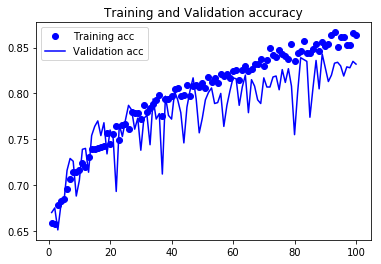

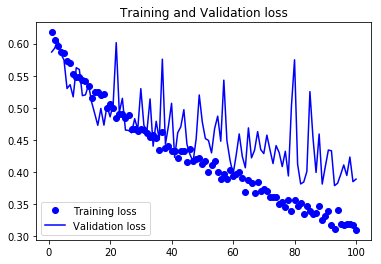

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

#plt.show()